# Assignment 2: Clustering California Housing with K-means

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
"Tonight, more than 130,000 Californians will go to sleep homeless. That’s enough to fill Dodger Stadium, AT&T Park and Petco Park. The biggest culprit is rising housing costs. From 2000 to 2014, median rent in California increased by more than one-third, while real incomes for renters fell by 7 percent. Today, 1.5 million Californians spend more than half their income on housing. This crisis threatens not just low-income families but our entire economy, driving businesses to relocate to states in which their employees can afford to live. - **Business Insider, Sep 2018.**"

![Half of the homes in San Franciso is now one million or above](https://www.travelinusa.us/wp-content/uploads/sites/3/2017/11/Painted-Ladies-San-Francisco-01.jpg).

In this assignment, you will attempt to cluster the California Housing by implementing and analyzing the k-means algorithm to the data. K-Means is one of the most popular clustering algorithms. K-means stores k-centroids that it uses to define clusters. A point is considered to be in a particular cluster if it is closer to that cluster's centroid than any other centroid. For references, you may refer to my lecture on K-means or Chapter 2 of the textbook if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python and submit this Jupyter Notebook file (.ipynb) to earn a total of 100 pts. You will gain points depending on how you perform in the following sections.

**Note**: In order for your assignment to be graded, you must save your Notebook filename under this format: **yourUvaUserId_assignment_2_kmeans.ipynb**.


---
## 1. PRE-PROCESSING THE DATA (10 pts)

Download the California Housing dataset from the below link. This dataset includes statistics about the median income, median age, average number of rooms per person, average number of persons in a household etc. The statistics were gathered per geographical block.

**Data Acquiring:** Download the dataset from https://www.kaggle.com/camnugent/california-housing-prices

**Data Discovery, Visualization, and Cleaning:** Fortunately, this step have been given to you from chapter 2. However, you should review them and write the code necessary for the purposes of this assignment.

In [ ]:
# You might want to use the following package
from pandas.plotting import scatter_matrix # optional
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

np.random.seed(42)

# Your code goes here for this section, make sure you also include the output to answer the above questions.
def loadcalihousingdata():
  # The column names are adopted from the dataset page on Kaggle
  housing = pd.read_csv('housing.csv')
  return housing

data = loadcalihousingdata()
data.head(10)



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


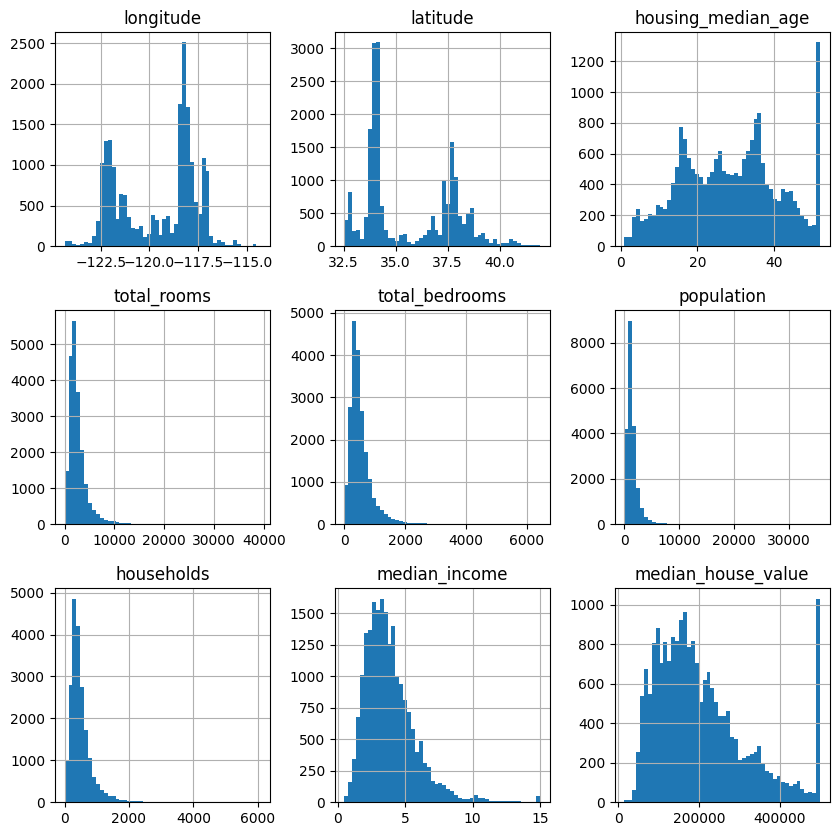

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins = 50, figsize=(10,10))
plt.show()
#save_fig("attribute_histogram_plots")

In [ ]:
corr_matrix = data.corr()

<ipython-input-5-bf8eb1dc5e60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>,
        <Axes: xlabel='latitude', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>,
        <Axes: xlabel='latitude', ylabel='total_rooms'>],
       [<Axes

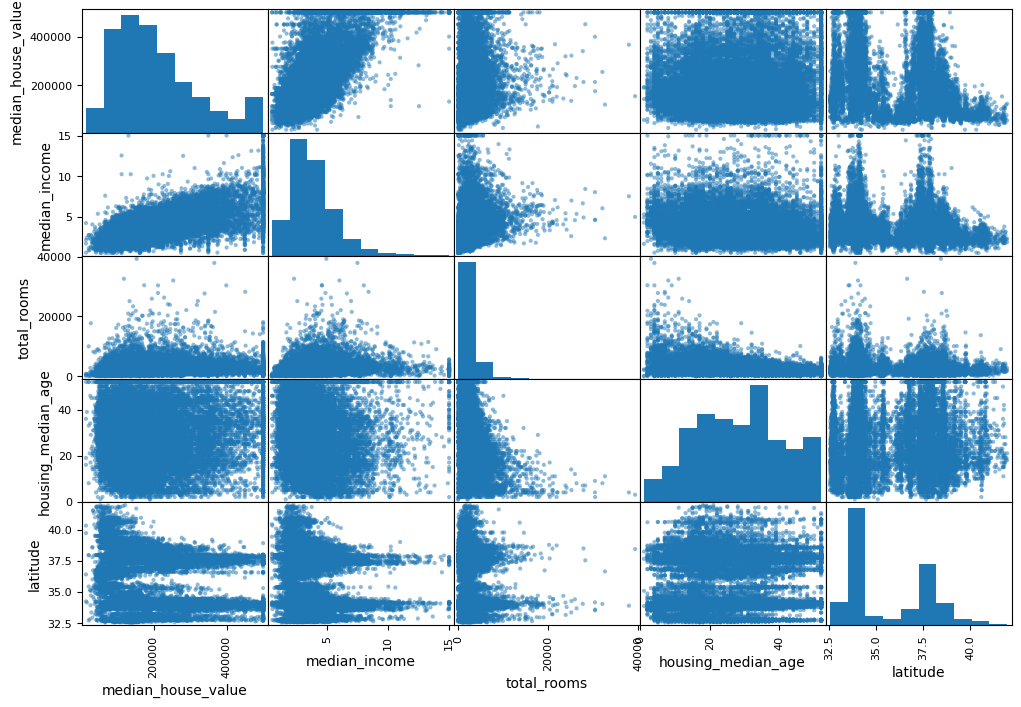

In [ ]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]

scatter_matrix(data[attributes], figsize=(12,8))

In [ ]:
cali_num = data.select_dtypes(include=[np.number])
cali_cat = data.select_dtypes(include = [object])

In [ ]:
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'median')),
        ('std_scaler', StandardScaler()),
    ])

num_attribs = list(cali_num)
cat_attribs = list(cali_cat)

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

clean_data = full_pipeline.fit_transform(data)

In [ ]:
clean_data.shape

(20640, 14)

- - -
## 2. IMPLEMENTING K-MEANS (40 pts)

You must implement your own version of K-Means Algorithm. Input a cluster count K and M data points each with its own vector of N features, along with the choice of a distance measure; then:

1. Initialize K centroids. In our case, a centroid is just the average of all data in a cluster.
2. Assign each data point to the cluster that has the closest centroid base on a **distance measure** below.
3. After all data points have been assigned to clusters, recalculate the centroids for each cluster (as averages of all points in the cluster).
4. Repeat the data assignments and centroid calculations until no change in housing assignment occurs between iterations.

**Distance Measures:** Your implementation must include three distance metrics: Manhattan Distance, Euclidean Distance, Sup Distance. These 3 distance metrics can be generalized by the Minkovski Distance:
$D(\mathbf{x},\mathbf{y}) = \sqrt[\leftroot{2}\uproot{2}p]{\sum\limits_{i=1}^n|x_i - y_i|^p}$ where $p=1$ for Mahattan, $p=2$ for Euclidean, and $p=\infty$ for Sup Distance.

**Implementation Notes:** Note that your functions should return distance measures; that is, the returned value should be high if the two vectors are dissimilar, low if they are similar, and zero if they are completely identical.

In [ ]:
# Function: K Means
# -------------
# K-Means is an algorithm that takes in a dataset and a constant
# k and returns k centroids (which define clusters of data in the
# dataset which are similar to one another).

def distance(x,y,metric):
  n = x.shape[0]
  dist = np.empty((x.shape[0],y.shape[0]))
  if metric == "manhattan":
    p = 1
    for i in range(n):
      dist[i] = (((np.abs(x[i]-y)**p).sum(axis=1))**(1/p))
  if metric == "euclidean":
    p = 2
    for i in range(n):
      dist[i] = (((np.abs(x[i]-y)**p).sum(axis=1))**(1/p))
  if metric == "sup":
    for i in range(n):
      dist[i] = (np.abs(x[i]-y).max(axis=1))
  return dist

def k_means(k, data = clean_data, metric = "euclidean"):
  np.random.seed(42)
  centroids = data[np.random.choice(data.shape[0], k, replace=False)]
  distances = distance(data, centroids, metric)
  labels = np.argmin(distances, axis=1)
  converged = False
  iteration = 0

  while not converged:
    iteration += 1
    prev_distances = distances
    prev_labels = labels
    std = np.zeros((k, data.shape[1]))
    sse = 0

    for i in range(k):
      cluster = data[labels == i]
      centroids[i] = np.mean(cluster, axis=0)
      std[i] = np.std(cluster, axis=0)
      sse += np.sum(distance(cluster, centroids[i:i+1], metric="euclidean")**2)
    distances = distance(data, centroids, metric)
    labels = np.argmin(distances, axis=1)
    converged = np.array_equal(distances, prev_distances) and np.array_equal(labels, prev_labels)

  return centroids, labels, std, sse


- - -
## 3. CLUSTERING HOUSING INTO REGIONS (40 pts)

Now that you have implemented the K-Means as the clustering algorithm. Applying the algorithm for k=2 clusters to see if you can split California into a Northern and Southern regions.

* **Cluster the data:** Report the SSE (sum squared error), cluster means, within cluster standard deviations for each attribute, etc. Visualize the clustering by plot the latitude along the X axis and longitude along the Y axis. You should get a plot that looks roughly in the shape of California (see Chapter 2 for more details). Using the cluster means and std. deviations as representative values in the cluster, what can you say about the clusters that were found? How do they compare with what you know about cities and areas in California? What can you attribute the gaps to? It will definitely be helpful to have a map of California handy.

* **Change the number of clusters:** Increase the value of k from 2 to 3,4,..,10 and repeat the clustering process above. Record cluster means and standard deviations. When you change k, do any additional patterns emerge? If so, what are they? Applying the algorithm for 10 clusters to see if it clearly identified the silicon valley area as one cluster (where houses are relatively new and expensive, median income is high), the area of San Francisco as another etc. While SF and Silicon Valley may have a somewhat similar profile (at least, compared with mid CA), they were separated mainly due to the latitude/longtitue properties, that involve a dimension of geographical cohesiveness.


k= 2
SSE: 155912.96730341995
feature 1 :
longitude mean: -0.02432169569635598
longitude standard deviation: 0.9997382507446056
latitude mean: 0.023025267689808615
latitude standard deviation: 1.0073988323682912
housing_median_age mean: 0.11529596968702903
housing_median_age standard deviation: 0.9725769422576367
total_rooms mean: -0.25414232264918507
total_rooms standard deviation: 0.46260765396203024
total_bedrooms mean: -0.2639350017027054
total_bedrooms standard deviation: 0.4809067308004223
population mean: -0.24430472546691478
population standard deviation: 0.5129182827545086
households mean: -0.2642634203503513
households standard deviation: 0.4896848035265707
median_income mean: -0.021161041950865538
median_income standard deviation: 1.0053764226803417
median_house_value mean: -0.018542661817138765
median_house_value standard deviation: 1.0069525247822335
ocean_proximity mean: 0.4381578947368421
ocean_proximity standard deviation: 0.49616081467266726
ocean prox 1 mean: 0.3162280

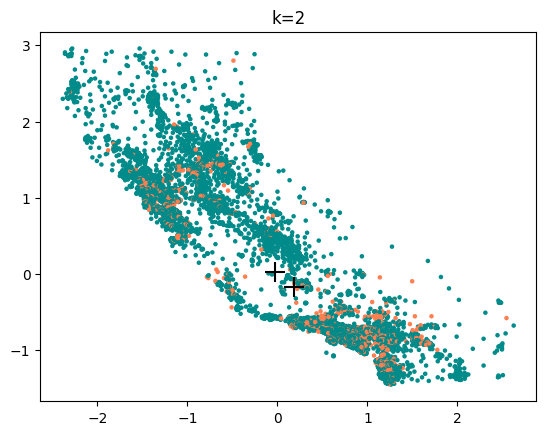

k= 3
SSE: 122226.85564020059
feature 1 :
longitude mean: -1.034622627245096
longitude standard deviation: 0.4936079244637241
latitude mean: 1.0686390130880672
latitude standard deviation: 0.47371399342567616
housing_median_age mean: 0.0746487606206636
housing_median_age standard deviation: 1.042021762521996
total_rooms mean: -0.20757493692052084
total_rooms standard deviation: 0.5200337204546583
total_bedrooms mean: -0.24296975990425973
total_bedrooms standard deviation: 0.5347261621290972
population mean: -0.2789119855835748
population standard deviation: 0.5302523522489174
households mean: -0.24901651273262515
households standard deviation: 0.5519999075319377
median_income mean: -0.07433639650195528
median_income standard deviation: 0.979728043623096
median_house_value mean: -0.13162500918171463
median_house_value standard deviation: 1.024566076439934
ocean_proximity mean: 0.17202630005977287
ocean_proximity standard deviation: 0.37740330171782277
ocean prox 1 mean: 0.473520621637776

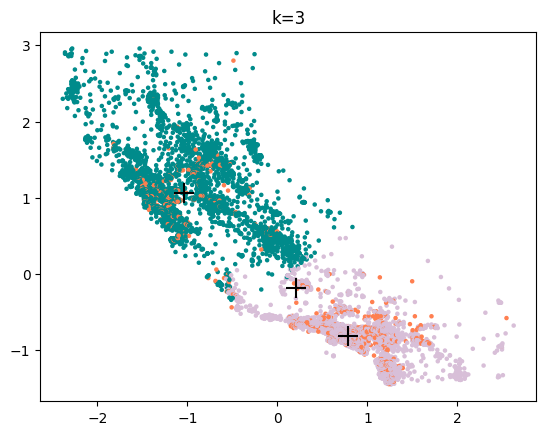

k= 4
SSE: 107067.74885218637
feature 1 :
longitude mean: -1.010401032165374
longitude standard deviation: 0.5065539221803431
latitude mean: 1.104177996241642
latitude standard deviation: 0.4884870648720287
housing_median_age mean: 0.05543869869664931
housing_median_age standard deviation: 1.038066994896878
total_rooms mean: -0.2409460801082949
total_rooms standard deviation: 0.5032539301391319
total_bedrooms mean: -0.24291680376920421
total_bedrooms standard deviation: 0.538769149771451
population mean: -0.27620379613939744
population standard deviation: 0.5435609548151537
households mean: -0.2546678447770078
households standard deviation: 0.5548642502185241
median_income mean: -0.3197835135750247
median_income standard deviation: 0.6425100871181447
median_house_value mean: -0.40543802799207795
median_house_value standard deviation: 0.7256137671110622
ocean_proximity mean: 0.14748896247240617
ocean_proximity standard deviation: 0.35459267959340124
ocean prox 1 mean: 0.5333885209713024


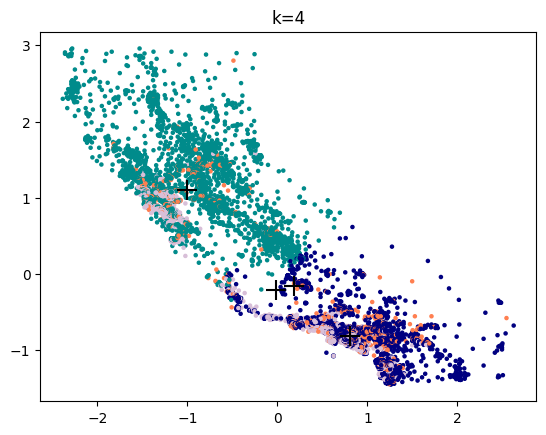

k= 5
SSE: 94857.26343210689
feature 1 :
longitude mean: -1.006998487242277
longitude standard deviation: 0.5133674701467004
latitude mean: 1.1107047543770583
latitude standard deviation: 0.4956906776811284
housing_median_age mean: 0.09537332614531294
housing_median_age standard deviation: 1.0321147790525684
total_rooms mean: -0.2997672575233746
total_rooms standard deviation: 0.43776865551332117
total_bedrooms mean: -0.3062102116513464
total_bedrooms standard deviation: 0.46657781750120414
population mean: -0.3353354318111012
population standard deviation: 0.47457794834594286
households mean: -0.3206447152324682
households standard deviation: 0.4793233887083514
median_income mean: -0.33853244844486147
median_income standard deviation: 0.63751882399054
median_house_value mean: -0.4288235290583118
median_house_value standard deviation: 0.7169038586381121
ocean_proximity mean: 0.1416678837447057
ocean_proximity standard deviation: 0.3487091832171865
ocean prox 1 mean: 0.5414049948882722
o

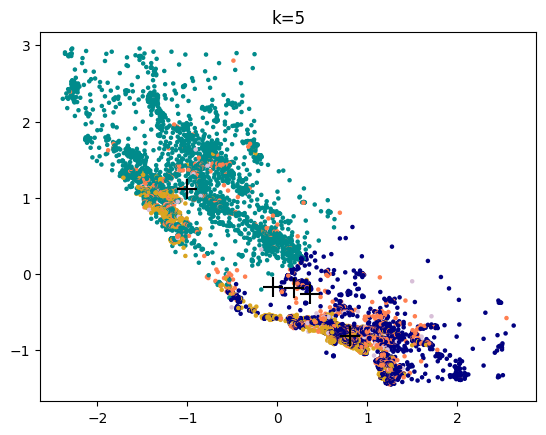

k= 6
SSE: 87382.91655451867
feature 1 :
longitude mean: 0.2162672625952613
longitude standard deviation: 0.9491192187766169
latitude mean: -0.21694542161371946
latitude standard deviation: 0.8816975966697964
housing_median_age mean: -0.8128713754046778
housing_median_age standard deviation: 0.7162089431742312
total_rooms mean: 1.3261052312422519
total_rooms standard deviation: 0.8361531587526368
total_bedrooms mean: 1.468279992418506
total_bedrooms standard deviation: 0.7849675545333733
population mean: 1.349417701972316
population standard deviation: 0.8180511075271477
households mean: 1.474417510262909
households standard deviation: 0.7538168706362213
median_income mean: 0.006353493186834836
median_income standard deviation: 0.7796676339864843
median_house_value mean: 0.025256732754681266
median_house_value standard deviation: 0.8252344016217075
ocean_proximity mean: 0.49286587851610275
ocean_proximity standard deviation: 0.4999491017200231
ocean prox 1 mean: 0.3232776192417448
ocean

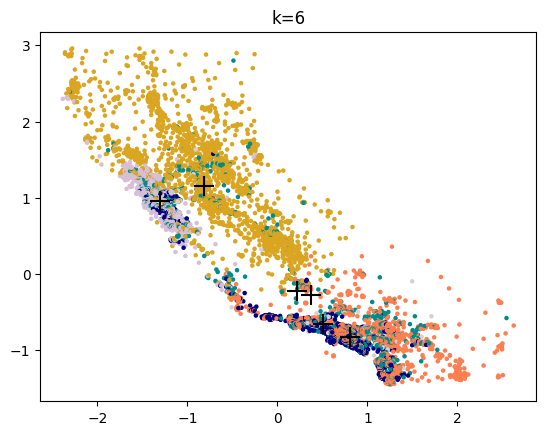

k= 7
SSE: 82334.82236309731
feature 1 :
longitude mean: -0.782220448501271
longitude standard deviation: 0.5775038087080967
latitude mean: 1.1026262038567265
latitude standard deviation: 0.6207051677002459
housing_median_age mean: -0.753224421419557
housing_median_age standard deviation: 0.5773333252413289
total_rooms mean: -0.12947108318301354
total_rooms standard deviation: 0.48514700044037773
total_bedrooms mean: -0.14383112179598317
total_bedrooms standard deviation: 0.5093218652116768
population mean: -0.17663550412911536
population standard deviation: 0.5318074205028964
households mean: -0.17410398959279286
households standard deviation: 0.5274098409799197
median_income mean: -0.37686484137535486
median_income standard deviation: 0.60373157130716
median_house_value mean: -0.6924684414159117
median_house_value standard deviation: 0.4755456603737871
ocean_proximity mean: 0.12226226781258663
ocean_proximity standard deviation: 0.3275884700075771
ocean prox 1 mean: 0.7790407540892709

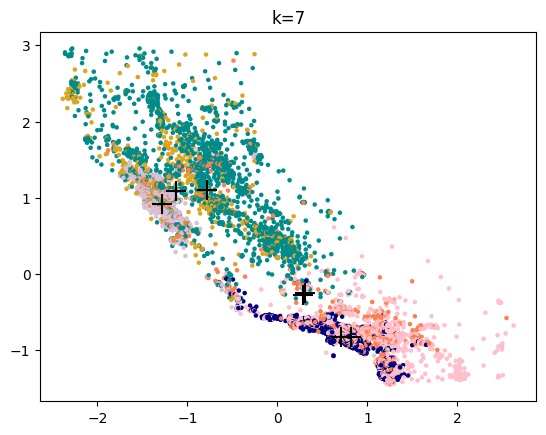

k= 8
SSE: 76465.24765660928
feature 1 :
longitude mean: -0.7911311683026119
longitude standard deviation: 0.5689236355331783
latitude mean: 1.131265948158869
latitude standard deviation: 0.6030054063604903
housing_median_age mean: -0.7155962601850204
housing_median_age standard deviation: 0.5953405304402869
total_rooms mean: -0.1496853572442384
total_rooms standard deviation: 0.4940135921908919
total_bedrooms mean: -0.15941755337473992
total_bedrooms standard deviation: 0.5211053622766978
population mean: -0.19058078847664936
population standard deviation: 0.5417814254693426
households mean: -0.1896782013769634
households standard deviation: 0.5402973884179516
median_income mean: -0.4055411831724283
median_income standard deviation: 0.5912897468035354
median_house_value mean: -0.7193975745033832
median_house_value standard deviation: 0.4612866242043902
ocean_proximity mean: 0.11433305716652858
ocean_proximity standard deviation: 0.31821535036116777
ocean prox 1 mean: 0.7964650648991991

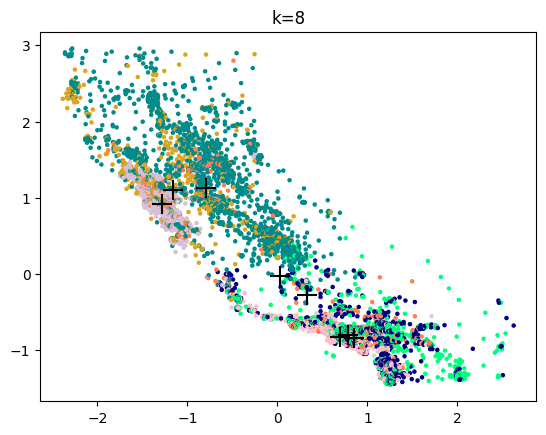

k= 9
SSE: 72457.6737560677
feature 1 :
longitude mean: -0.701993925291789
longitude standard deviation: 0.5795284237035294
latitude mean: 1.108906746479681
latitude standard deviation: 0.6337495070317444
housing_median_age mean: -0.48222270179800664
housing_median_age standard deviation: 0.7020914046782833
total_rooms mean: -0.4075888302031013
total_rooms standard deviation: 0.34683346190132497
total_bedrooms mean: -0.4297047386672225
total_bedrooms standard deviation: 0.360514534011492
population mean: -0.44126947931453236
population standard deviation: 0.39752915230380526
households mean: -0.46926653091711656
households standard deviation: 0.37011067221246907
median_income mean: -0.5111991540428287
median_income standard deviation: 0.580200748952396
median_house_value mean: -0.8405814405963888
median_house_value standard deviation: 0.42278035823164317
ocean_proximity mean: 0.0659679408138101
ocean_proximity standard deviation: 0.24822604939570425
ocean prox 1 mean: 0.8797780517879161

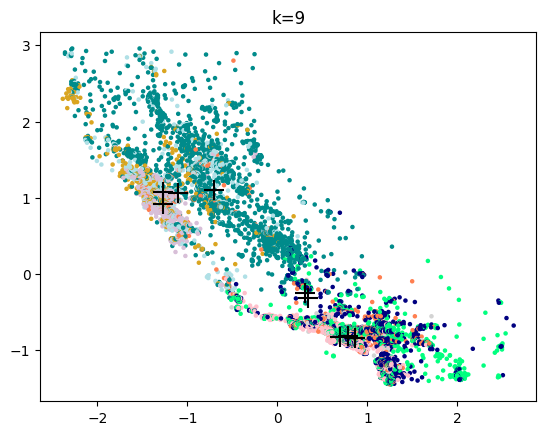

k= 10
SSE: 69455.8215575422
feature 1 :
longitude mean: -0.6865940388985781
longitude standard deviation: 0.5871413148389536
latitude mean: 1.099197224400024
latitude standard deviation: 0.6429193441810906
housing_median_age mean: -0.6781683744637172
housing_median_age standard deviation: 0.5936257117437992
total_rooms mean: -0.36879441231834753
total_rooms standard deviation: 0.3573939703260913
total_bedrooms mean: -0.3962161262610981
total_bedrooms standard deviation: 0.3657480978055955
population mean: -0.4156840367225638
population standard deviation: 0.40329981967064754
households mean: -0.4400166360886815
households standard deviation: 0.37555598466293266
median_income mean: -0.4545809001515796
median_income standard deviation: 0.6033842874564317
median_house_value mean: -0.8055724888704873
median_house_value standard deviation: 0.42331191845039684
ocean_proximity mean: 0.07075636110142906
ocean_proximity standard deviation: 0.2564174301117491
ocean prox 1 mean: 0.872429417915650

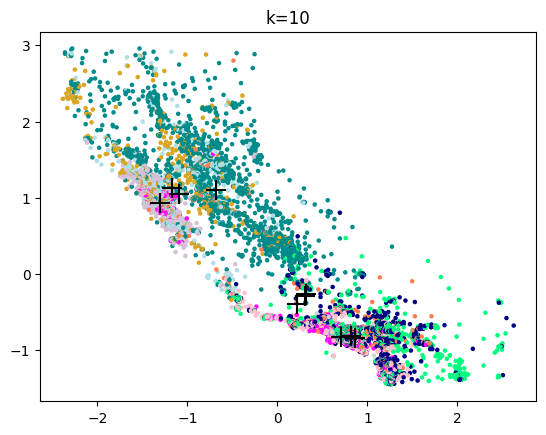

In [ ]:
# Your code goes here
color = np.array(['darkcyan', 'coral', 'thistle', 'navy', 'goldenrod', 'lightgrey', 'pink', 'springgreen', 'powderblue', 'fuchsia'])
import plotly.graph_objects as go


val = list(data.columns)
val.extend(["ocean prox 1","ocean prox 2","ocean prox 3","ocean prox 4"])

for i in range (2,11):
  centroids, index_for_each_cluster, std, sse = k_means(i, metric="euclidean")
  print("k=", i)
  print("SSE:", sse)
  for k in range(0,i):
    print("feature", k+1, ":")
    for j in range(len(val)):
      print(val[j], "mean:", centroids[k][j])
      print(val[j], "standard deviation:", std[k][j])
    print("\n")


  plt.scatter(clean_data[:,0],clean_data[:,1], s=5,c=color[index_for_each_cluster])
  plt.title("k="+str(i))
  plt.scatter(centroids[:,0],centroids[:,1],marker="+",s=200,c="black")
  plt.show()

# Your paragraph goes here for this section

With the clusters that were found, the means and standard deviations were not very good at representing the featuers of the areas they were in very clearly, but as the amount of clusters increased, the means began to approach values that would begin to stay consistent and the standard deviations also began to decrease. The clusters were also beginning to form around reas where populated cities of california are known to be found. Some of the gaps that were present in the scatter plots can be attributed to mountainous areas or places with water such as the San Fransico bay.

As k increases, it is much easier to see how the clusters separate the data points in an inland and coastal point of view. It is easy to see which points are more inland and which ones are closer to the ocean.

When k is equal to 10 it is easy to see where Silocon Valley and San Fransisco are. They are where the light grey and somewhat pink scatter points are located. The boundary between San Fransisco and Silocon Valley is not clear however. There is too much difference and similarites between some of the clusters to effectively break the data points apart in where they should be.

- - -
## 4. WRITING ON THE INTUITION FOR THE CALIFORNIA HOUSING CRISIS (10 pts)

This question is a qualitative one, and is intended to let you experiment with a real world clustering task. Hopefully it gives you some intuition as for how the preset number of clusters affects the clustering results. Too few clusters may not reveal the information that is in the data. Too many clusters may hurt data analysis as well, as it may not generalize (and in this sense, it is equivalent to over fitting).

Write at least one paragraph to demonstrate your intuition on the California Housing Crisis. You might also want to mention some possible solutions to solve it. You will receive credits based upon your insights and intuitions on this challenge.



As I said previously, as k increases, the accuracy of the clusters and the data points that are associated with these clusters also increases, but there could be issues with increasing the amount of clusters too high also. By having too many clusters, the data may be overfit and the model will attempt to cluster together data points based off features that do not hold a lot of significance.

Aside from this, it can be seen that house prices in california are extremely high when you put it into the context of the median income of the clusters. The price of the houses are an extremely large percentage of most of the clusters' income which is a big issue. People have to spend a majority of what they make just to simply live in a house when there are other expenses.

Some procedures that could be taken to sovle this issue would take a while to implement, but are steps that should be taken. First, the price of houses should be capped at a certain amount so that people do not have to pay prices that are extremely high. There should also be advancements towards populating areas in california that are less expensive or places that are less populated since it seems that location has a great influence on the costs of homes. In addition to these things, the government should do their best to provide aid to people who need it in the form of subsidies or do their best to simply lower the cost of living in the state overall by passing policies.

- - -
### NEED HELP?

In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my lectures and/or the textbook
 * Talk to the TA, they are available and there to help you during their OH.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 2:...".

Best of luck and have fun!